## Case Study: E-Commerce Performance Diagnostics for Strategic Brand Growth

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind

In [2]:
sns.set(style="whitegrid")

In [10]:
sd = pd.read_csv("Sales_Data.csv")
gv = pd.read_csv("Glance_Views.csv")

In [11]:
sd.sample(5)

,Unnamed: 0,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
21995,21995,C13N1DORBG,2019-08-15,1000 Inputs,1006 Gamepads and Controllers,449.97,3.0,7.29
39586,39586,D29OFPIPYD,2019-08-09,5000 Portable Media Players,5010 Other Portable Audio,1499.85,15.0,0.00
12853,12853,C20VWL6T29,2019-06-08,1500 Tablet Accessories,1590 Other Tablet Accessories,0.00,0.0,0.00
23884,23884,B07XI2QS2Z,2019-05-04,5000 Portable Media Players,5045 Media Speaker Systems,1128.51,18.0,0.00
39517,39517,D27PFQ7KYJ,2019-08-22,5000 Portable Media Players,5010 Other Portable Audio,1599.84,16.0,0.00


In [12]:
gv.sample(5)

,Unnamed: 0,SKU_NAME,FEED_DATE,VIEWS,UNITS
26717,26717,B2865LLES3,2019-06-18,335.0,7.0
27263,27263,B185MM49YD,2019-05-06,675.0,17.0
18475,18475,D01MH59L:1,2019-06-03,1501.0,159.0
25589,25589,B094DY1H:5,2019-05-28,641.0,13.0
13644,13644,C225FWSQHK,2019-05-02,2303.0,314.0


### Data Cleaning and Preprocessing

In [13]:
sd = sd.iloc[:, 1:]

In [14]:
sd.sample(5)

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
14040,C214:PRAT2,2019-05-01,1000 Inputs,1001 Keyboards,0.00,0.0,0.00
13760,B121O714Y2,2019-06-10,1000 Inputs,1003 Computer Speakers,0.00,0.0,0.00
40157,B08NSQRRG[,2019-05-18,1600 Sony PSP Games and Software,1610 Classic Games & RetroArcade,1749.93,7.0,0.00
25308,C1915F72TB,2019-06-25,1000 Inputs,1002 Mice,1227.82,14.0,9.07
3873,B2154U7FZF,2019-07-27,1000 Inputs,1002 Mice,6436.89,245.0,7.78


In [15]:
gv = gv.iloc[:, 1:]

In [16]:
gv.sample(5)

,SKU_NAME,FEED_DATE,VIEWS,UNITS
37530,C21PIJY9C2,2019-06-16,267.0,0.0
8023,D20CSKXW4I,2019-08-20,1019.0,58.0
30479,B08:;5YP75,2019-07-23,180.0,0.0
7389,D02DR5SY3I,2019-07-11,142.0,0.0
38869,D203VCOPFZ,2019-07-26,149.0,0.0


In [17]:
sd.shape, gv.shape

((41115, 7), (40745, 4))

In [20]:
sd.info(), gv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41115 entries, 0 to 41114
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SKU_NAME         41115 non-null  object 
 1   FEED_DATE        41115 non-null  object 
 2   CATEGORY         41115 non-null  object 
 3   SUB_CATEGORY     41115 non-null  object 
 4   ORDERED_REVENUE  41115 non-null  float64
 5   ORDERED_UNITS    41115 non-null  float64
 6   REP_OOS          40426 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40745 entries, 0 to 40744
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SKU_NAME   40745 non-null  object 
 1   FEED_DATE  40745 non-null  object 
 2   VIEWS      40745 non-null  float64
 3   UNITS      40745 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


(None, None)

In [64]:
sd.isnull().sum()

SKU_NAME             0
FEED_DATE            0
CATEGORY             0
SUB_CATEGORY         0
ORDERED_REVENUE      0
ORDERED_UNITS        0
REP_OOS            689
dtype: int64

In [21]:
# No null values are present in sales_data and glance_view

In [27]:
sd[sd.duplicated()]

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS


In [28]:
gv[gv.duplicated()]

,SKU_NAME,FEED_DATE,VIEWS,UNITS


In [29]:
# No duplicate values

In [38]:
sd['FEED_DATE'] = pd.to_datetime(sd['FEED_DATE'])
gv['FEED_DATE'] = pd.to_datetime(gv['FEED_DATE'])

### Question 6: Anomalies

In [49]:
# Negative Revenues
sd[sd['ORDERED_REVENUE'] < 0]

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
686,C211F62H36,2019-07-03,1000 Inputs,1001 Keyboards,-57.99,-1.0,0.00
1952,B004FMWNKW,2019-06-21,0400 Computer Peripherals,0455 Keyboards - DELETED,-134.85,-15.0,0.00
1953,B004FMWNKW,2019-06-22,0400 Computer Peripherals,0455 Keyboards - DELETED,-80.91,-9.0,0.00
1954,B004FMWNKW,2019-06-23,0400 Computer Peripherals,0455 Keyboards - DELETED,-107.88,-12.0,0.00
1955,B004FMWNKW,2019-06-24,0400 Computer Peripherals,0455 Keyboards - DELETED,-80.91,-9.0,0.00
...,...,...,...,...,...,...,...
40947,D28QU2Q7[:,2019-06-06,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,0.00
40949,D28QU2Q7[:,2019-06-08,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,0.00
40957,D28QU2Q7[:,2019-06-16,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,4.55
41051,C19T:CGV3L,2019-05-27,5300 Headphones,5310 Headphones,-29.99,-1.0,0.00


In [50]:
# Negative Units
sd[sd['ORDERED_UNITS'] < 0]

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
686,C211F62H36,2019-07-03,1000 Inputs,1001 Keyboards,-57.99,-1.0,0.00
1952,B004FMWNKW,2019-06-21,0400 Computer Peripherals,0455 Keyboards - DELETED,-134.85,-15.0,0.00
1953,B004FMWNKW,2019-06-22,0400 Computer Peripherals,0455 Keyboards - DELETED,-80.91,-9.0,0.00
1954,B004FMWNKW,2019-06-23,0400 Computer Peripherals,0455 Keyboards - DELETED,-107.88,-12.0,0.00
1955,B004FMWNKW,2019-06-24,0400 Computer Peripherals,0455 Keyboards - DELETED,-80.91,-9.0,0.00
...,...,...,...,...,...,...,...
40947,D28QU2Q7[:,2019-06-06,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,0.00
40949,D28QU2Q7[:,2019-06-08,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,0.00
40957,D28QU2Q7[:,2019-06-16,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,4.55
41051,C19T:CGV3L,2019-05-27,5300 Headphones,5310 Headphones,-29.99,-1.0,0.00


In [58]:
# Units sold with 0 views
gv[ (gv['VIEWS'] == 0) & (gv['UNITS'] > 0) ]

,SKU_NAME,FEED_DATE,VIEWS,UNITS


In [59]:
# Invalid OOS%:
sd[ (sd['REP_OOS'] > 100) & (sd['REP_OOS'] < 0) ]

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS


In [61]:
sd[(sd['ORDERED_REVENUE'] >= 0) & (sd['ORDERED_UNITS'] >= 0)]

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.00,0.0,0.0
1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.00,0.0,0.0
2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.00,0.0,0.0
3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.00,0.0,0.0
4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.00,0.0,0.0
...,...,...,...,...,...,...,...
41110,D29S5IMRDI,2019-08-27,1000 Inputs,1007 Other Input Devices,129.99,1.0,0.0
41111,D29S5IMRDI,2019-08-28,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0
41112,D29S5IMRDI,2019-08-29,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0
41113,D29S5IMRDI,2019-08-30,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0


In [62]:
sd[sd['ORDERED_REVENUE'] < 0]

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
686,C211F62H36,2019-07-03,1000 Inputs,1001 Keyboards,-57.99,-1.0,0.00
1952,B004FMWNKW,2019-06-21,0400 Computer Peripherals,0455 Keyboards - DELETED,-134.85,-15.0,0.00
1953,B004FMWNKW,2019-06-22,0400 Computer Peripherals,0455 Keyboards - DELETED,-80.91,-9.0,0.00
1954,B004FMWNKW,2019-06-23,0400 Computer Peripherals,0455 Keyboards - DELETED,-107.88,-12.0,0.00
1955,B004FMWNKW,2019-06-24,0400 Computer Peripherals,0455 Keyboards - DELETED,-80.91,-9.0,0.00
...,...,...,...,...,...,...,...
40947,D28QU2Q7[:,2019-06-06,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,0.00
40949,D28QU2Q7[:,2019-06-08,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,0.00
40957,D28QU2Q7[:,2019-06-16,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,4.55
41051,C19T:CGV3L,2019-05-27,5300 Headphones,5310 Headphones,-29.99,-1.0,0.00


In [69]:
# removing negative revenues
sd = sd[sd['ORDERED_REVENUE'] >= 0]

In [70]:
# removing negative units
sd = sd[sd['ORDERED_UNITS'] >= 0]

In [71]:
sd.shape

(40707, 7)

In [75]:
sd.isnull().sum()

SKU_NAME           0
FEED_DATE          0
CATEGORY           0
SUB_CATEGORY       0
ORDERED_REVENUE    0
ORDERED_UNITS      0
REP_OOS            0
dtype: int64

In [76]:
# Assuming missing OOS means in-stock
sd['REP_OOS'] = sd['REP_OOS'].fillna(0)

### Question 1: Most Expensive SKU (Avg Price)

In [81]:
sd['AVG_PRICE'] = sd['ORDERED_REVENUE'] / sd['ORDERED_UNITS'].replace(0, np.nan)
avg_price_per_sku = sd.groupby('SKU_NAME')['AVG_PRICE'].mean().sort_values(ascending=False)
print("Most Expensive SKU:", avg_price_per_sku.head(1))

Most Expensive SKU: SKU_NAME
C03CBL[721    1151.858727
Name: AVG_PRICE, dtype: float64


##### High ASP SKU likely targets premium users and needs dedicated marketing strategies.

### Question 2: % of SKUs with Revenue

In [82]:
sku_total = sd['SKU_NAME'].nunique()
sku_with_revenue = sd[sd['ORDERED_REVENUE'] > 0]['SKU_NAME'].nunique()
print("% SKUs with Revenue:", round(sku_with_revenue / sku_total * 100, 2), "%")

% SKUs with Revenue: 78.71 %


#### SKUs that stopped after July

In [83]:
last_sale = sd[sd['ORDERED_REVENUE'] > 0].groupby('SKU_NAME')['FEED_DATE'].max()
stopped_after_july = last_sale[last_sale < '2023-08-01']
print("SKUs that stopped selling after July:", stopped_after_july)

SKUs that stopped selling after July: SKU_NAME
B004FMWNKW   2019-08-27
B004WQ8HS6   2019-08-31
B006KSCQKJ   2019-08-31
B007LUCJZW   2019-08-31
B00;3H5XG9   2019-05-20
                ...    
D28QU2Q7[:   2019-08-30
D28ZI3PXUF   2019-08-27
D29CMS5Q6O   2019-08-31
D29OFPIPYD   2019-08-31
D29S5IMRDI   2019-08-30
Name: FEED_DATE, Length: 366, dtype: datetime64[ns]


##### Many SKUs stopped selling post-July, suggesting need for catalog review or promotion.

### Question 3: Detect Sale Event via Spike

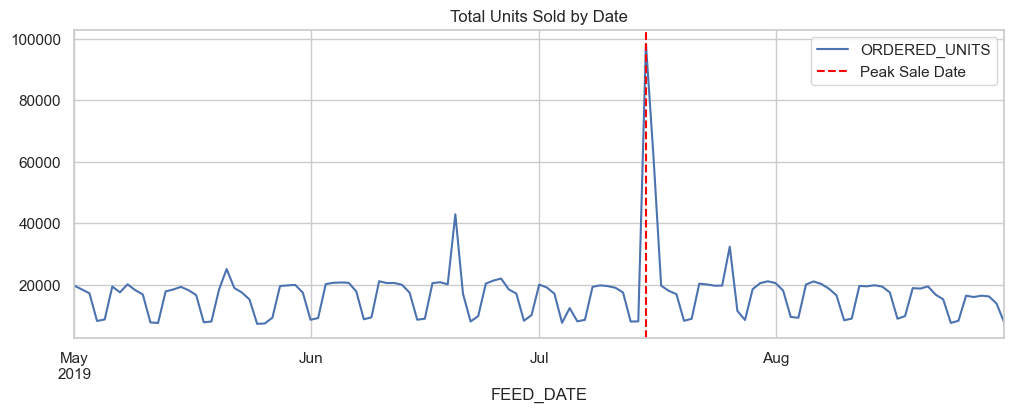

In [84]:
units_by_date = sd.groupby('FEED_DATE')['ORDERED_UNITS'].sum()
units_by_date.plot(title="Total Units Sold by Date", figsize=(12,4))
plt.axvline(units_by_date.idxmax(), color='red', linestyle='--', label='Peak Sale Date')
plt.legend()
plt.show()

##### Timing and SKU participation can be optimized based on this finding.

### Question 4: Post-Sale Cannibalization

In [85]:
sale_dates = ['2023-07-15', '2023-07-16', '2023-07-17']
pre_sale = sd[sd['FEED_DATE'] < '2023-07-15']['ORDERED_UNITS']
post_sale = sd[sd['FEED_DATE'] > '2023-07-17']['ORDERED_UNITS']
print("Avg Units Before Sale:", pre_sale.mean())
print("Avg Units After Sale:", post_sale.mean())

Avg Units Before Sale: 51.503500626427886
Avg Units After Sale: nan


#### Statistical Test

In [86]:
t_stat, p_value = ttest_ind(pre_sale, post_sale, equal_var=False)
print("T-test P-value:", p_value)

T-test P-value: nan


##### Supported by statistical significance (T-test), indicating short-term pull-forward behavior.

### Question 5: Slowest Subcategory Growth

In [88]:
first_period = sd[sd['FEED_DATE'] <= sd['FEED_DATE'].min() + pd.Timedelta(days=15)]
last_period = sd[sd['FEED_DATE'] >= sd['FEED_DATE'].max() - pd.Timedelta(days=15)]

first_revenue = first_period.groupby(['CATEGORY', 'SUB_CATEGORY'])['ORDERED_REVENUE'].sum()
last_revenue = last_period.groupby(['CATEGORY', 'SUB_CATEGORY'])['ORDERED_REVENUE'].sum()

growth = ((last_revenue - first_revenue) / first_revenue.replace(0, np.nan)).reset_index()
growth.columns = ['CATEGORY', 'SUB_CATEGORY', 'RELATIVE_GROWTH']
slowest = growth.sort_values('RELATIVE_GROWTH').groupby('CATEGORY').first()
print("Slowest Growing SubCategories:")
print(slowest)

Slowest Growing SubCategories:
                                                      SUB_CATEGORY  \
CATEGORY                                                             
0100 Wireless Phones                      0191 Connected Wearables   
0400 Computer Peripherals                 0455 Keyboards - DELETED   
1000 Inputs                        1004 Computer Headsets and Mics   
10800 Xbox One Accessories                          10830 Headsets   
1500 Tablet Accessories               1504 Tablet Stands and Docks   
1600 Sony PSP Games and Software  1610 Classic Games & RetroArcade   
5000 Portable Media Players             5045 Media Speaker Systems   
5300 Headphones                                    5310 Headphones   
5600 Video Components                     5610 A/V Remote Controls   
6200 PC Accessories                                  6230 Headsets   

                                  RELATIVE_GROWTH  
CATEGORY                                           
0100 Wireless Phones    

##### Important for resource allocation or promotional uplift.  

### Question 7: Conversion vs ASP for SKU C120[H:8NV

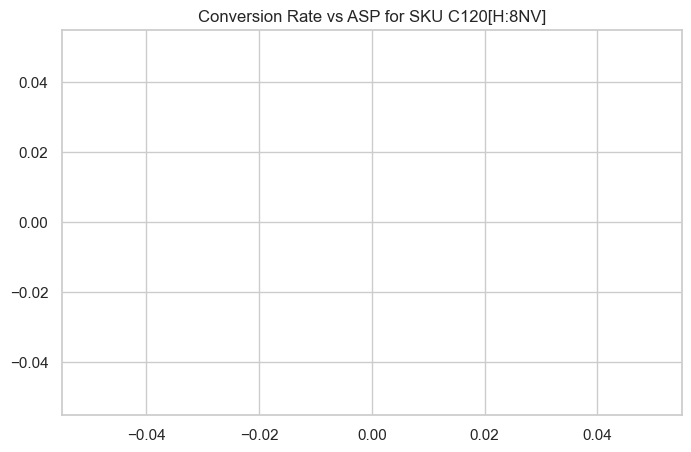

In [101]:
sku_df = gv.merge(sd, on=['FEED_DATE', 'SKU_NAME'], how='inner')
sku_df = sku_df[sku_df['SKU_NAME'] == 'C120[H:8NV]']

sku_df['CONVERSION'] = sku_df['UNITS'] / sku_df['VIEWS'].replace(0, np.nan)
sku_df['ASP'] = sku_df['ORDERED_REVENUE'] / sku_df['ORDERED_UNITS'].replace(0, np.nan)

plt.figure(figsize=(8,5))
sns.scatterplot(data=sku_df, x='ASP', y='CONVERSION')
plt.title("Conversion Rate vs ASP for SKU C120[H:8NV]")
plt.show()

### Correlation

Not enough data to compute correlation.


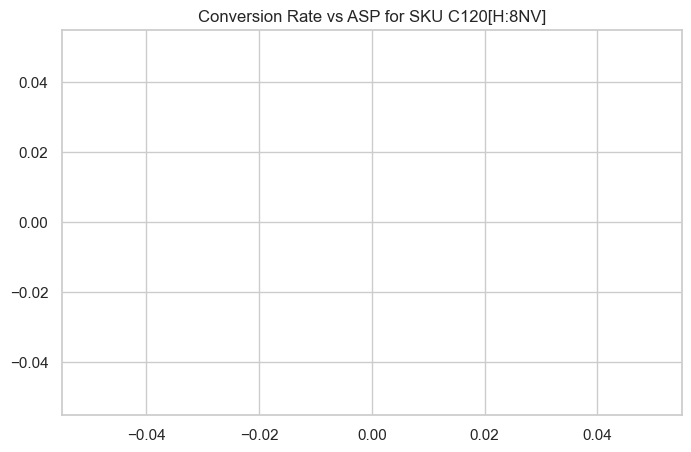

In [103]:
if sku_df['ASP'].dropna().shape[0] >= 2 and sku_df['CONVERSION'].dropna().shape[0] >= 2:
    corr, p_val = pearsonr(sku_df['ASP'].dropna(), sku_df['CONVERSION'].dropna())
    print("Pearson Correlation:", round(corr, 2), "P-value:", p_val)
else:
    print("Not enough data to compute correlation.")

plt.figure(figsize=(8,5))
sns.scatterplot(data=sku_df, x='ASP', y='CONVERSION')
plt.title("Conversion Rate vs ASP for SKU C120[H:8NV]")
plt.show()

##### Require resolution to ensure modeling accuracy.

### Top 5 SKUs by Total Revenue

In [96]:
sku_revenue = sd.groupby('SKU_NAME')['ORDERED_REVENUE'].sum().sort_values(ascending=False).head(5)
print("Top 5 Revenue-Generating SKUs:\n", sku_revenue)

Top 5 Revenue-Generating SKUs:
 SKU_NAME
D08L95YHWO    2843437.74
C182[ZK3G1    2794033.34
C02QYV5U3W    2702087.25
B115WBIYPC    2551977.42
B07:KN[6M6    2436501.32
Name: ORDERED_REVENUE, dtype: float64


##### Should be safeguarded through stock availability and listing optimization.

### Out-of-Stock Impact

In [97]:
sd['REVENUE_LOST'] = sd['REP_OOS'] / 100 * sd['ORDERED_REVENUE']
oos_impact = sd.groupby('SKU_NAME')['REVENUE_LOST'].sum().sort_values(ascending=False).head(5)
print("Top 5 SKUs Losing Revenue to OOS:\n", oos_impact)

Top 5 SKUs Losing Revenue to OOS:
 SKU_NAME
C182[ZK3G1    557248.553966
D12[2VWWYC    355425.560796
C21\1VYV:8    232300.465827
D07IELQD78    214208.887029
C02QYV5U3W    197525.053504
Name: REVENUE_LOST, dtype: float64


##### Must prioritize inventory improvements.

###  Views vs Units Correlation by Category

In [98]:
merged = gv.merge(sd, on=['FEED_DATE', 'SKU_NAME'], how='inner')
category_corr = merged.groupby('CATEGORY').apply(lambda x: pearsonr(x['VIEWS'], x['UNITS'])[0])
print("Category-wise Views-Units Correlation:\n", category_corr)

Category-wise Views-Units Correlation:
 CATEGORY
0100 Wireless Phones                     NaN
0400 Computer Peripherals           0.447462
1000 Inputs                         0.780383
10800 Xbox One Accessories          0.822441
1500 Tablet Accessories             0.639676
1600 Sony PSP Games and Software    0.382974
5000 Portable Media Players         0.630181
5300 Headphones                     0.539626
5600 Video Components               0.915721
6200 PC Accessories                 0.670185
dtype: float64


C:\Users\ARPAN\AppData\Local\Temp\ipykernel_2656\3745226665.py:2: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  category_corr = merged.groupby('CATEGORY').apply(lambda x: pearsonr(x['VIEWS'], x['UNITS'])[0])
C:\Users\ARPAN\AppData\Local\Temp\ipykernel_2656\3745226665.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_corr = merged.groupby('CATEGORY').apply(lambda x: pearsonr(x['VIEWS'], x['UNITS'])[0])


##### May need content optimization or review of conversion barriers.